In [ ]:
import sys, os
#this is a comment
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir) + "/src/"
sys.path.insert(0, parentdir) 

from modeling import *
from analysis import *
from plots import *
from pymer4.models import lmer

%load_ext autoreload
%autoreload 2

## Import Fitted Data

In [6]:
# R for reliability, V for volatility, T for controllability
type_ = "R"

colormap_ = {"R": colormaps["arctic"], "T": colormaps["berry"], "V": colormaps["grass"]}
colormap = colormap_[type_]


effort_versions, filter_fns, value_fns = get_effort_filter_value_options(type_)
# load data into analyzer with baseline filter_depth.value_path
a = Analyzer(f"raw.policy_compress.filter_depth.value_path", effort_versions, filter_fns, value_fns, type_, colors = colormap)

folder: raw
	[nParams] Found 7 params: ['0.0', '0.25', '0.5', '0.75', '1.0', 'inv_temp', 'lapse']


## Empirical Plots

### Figure 2 (A - C): Label Difference vs P(Choice = Left)

100%|██████████| 100/100 [00:01<00:00, 92.24it/s]


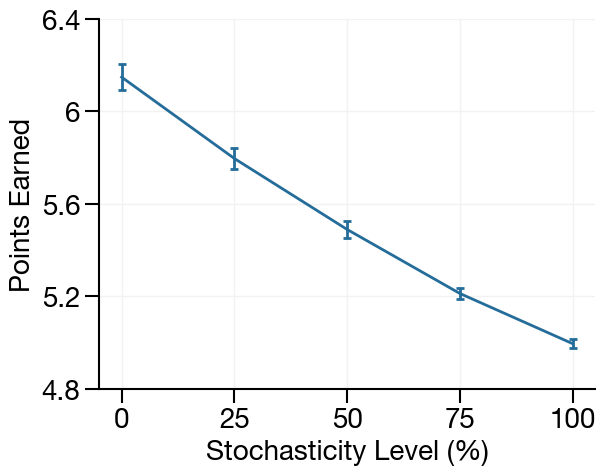

In [7]:
a.plot_checking_condition(trialwise_rewards, show_model = False)
plt.ylabel("Points Earned"); plt.xlabel("Stochasticity Level (%)"); plt.xticks(np.array(get_stochasticity_levels(type_)) * 100);
plt.yticks([4.8, 5.2, 5.6, 6, 6.4])
plt.gca().set_yticklabels([strsimplify(y) for y in plt.gca().get_yticks()]);
plt.gca().set_xticklabels([strsimplify(x) for x in plt.gca().get_xticks()]);

### Figure 2 (D - F): Stochasticity Level vs Points Earned

100%|██████████| 100/100 [00:00<00:00, 113.13it/s]


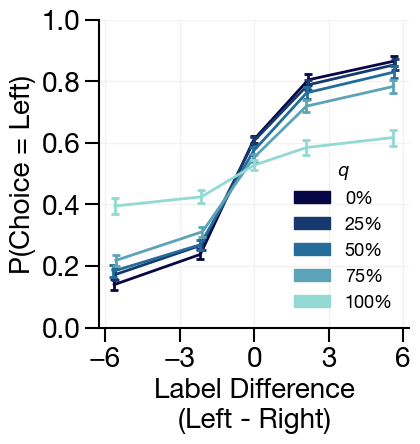

In [4]:
a.plot_checking(trialwise_greedydiff, trialwise_chooseleft, n_bins = 5, show_model = False)
plt.xlabel("Label Difference\n(Left - Right)"); plt.ylabel("P(Choice = Left)")
plt.ylim([0, 1])
plt.xticks([-6, -3, 0, 3, 6]);

### Figure 2 (G - I): Reaction Time Plots

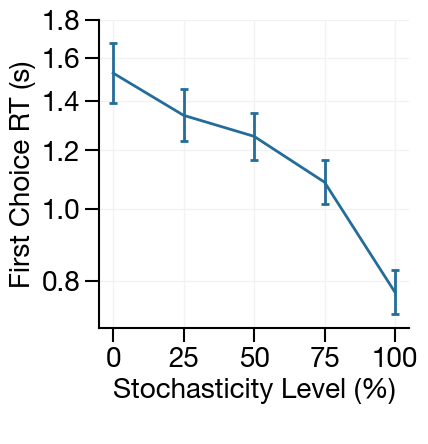

In [5]:
df_rt = a.plot_stochasticity_vs_rt()
plt.gca().set_xticklabels([strsimplify(x) for x in plt.gca().get_xticks()]);

## Model Plots

### Figure 4: Model Comparison Plots

N bootstrap 1000000.0


100%|██████████| 12/12 [00:07<00:00,  1.71it/s]


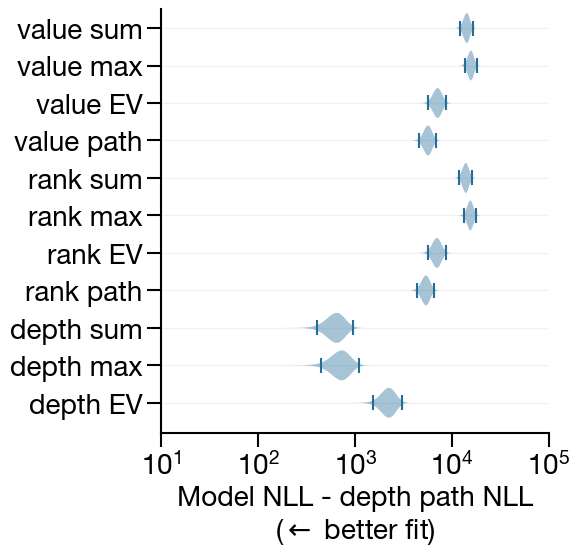

In [6]:
a.plot_model_comparison(format = "violin")
plt.xscale("log")
plt.xlim(10, 10**5)
plt.gca().set_xticks((10 ** np.arange(1, 6)).tolist())

### Figure 5: Model Checking Plots

 93%|█████████▎| 93/100 [00:03<00:00, 26.77it/s]/Users/jordanlei/miniconda3/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:821: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)
 93%|█████████▎| 93/100 [00:03<00:00, 26.91it/s]/Users/jordanlei/miniconda3/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:821: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)
100%|██████████| 100/100 [00:00<00:00, 114.60it/s]


([<matplotlib.axis.XTick at 0x356f19e50>,
 [Text(-6, 0, '−6'),
  Text(-3, 0, '−3'),
  Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(6, 0, '6')])

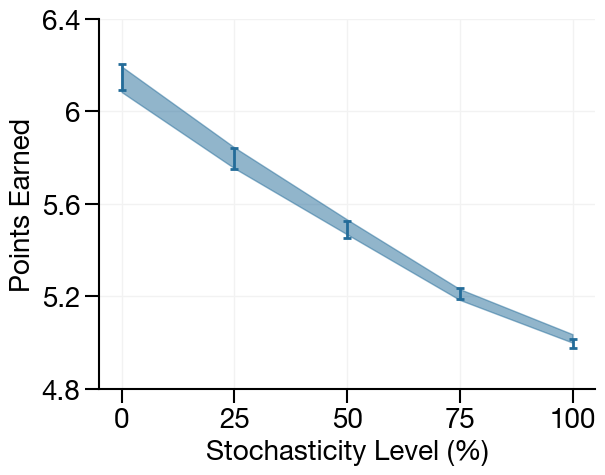

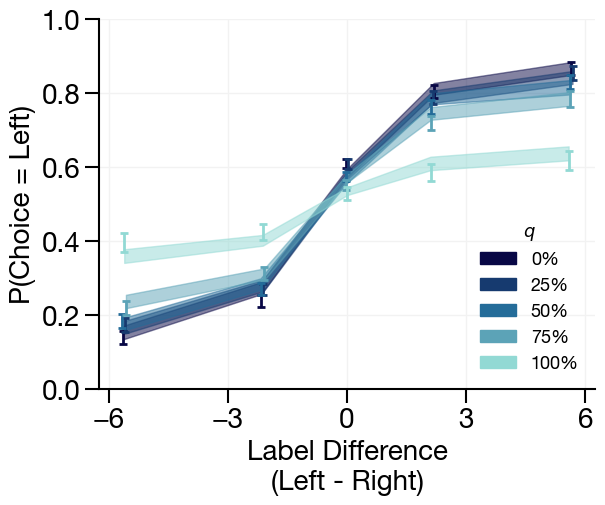

In [4]:
df_reward, df_reward_sim = a.plot_checking_condition(trialwise_rewards, show_model = True)
plt.ylabel("Points Earned"); plt.xlabel("Stochasticity Level (%)"); plt.xticks(np.array(get_stochasticity_levels(type_)) * 100);
plt.yticks([4.8, 5.2, 5.6, 6, 6.4])
plt.gca().set_yticklabels([strsimplify(y) for y in plt.gca().get_yticks()]);
plt.gca().set_xticklabels([strsimplify(x) for x in plt.gca().get_xticks()]);

df_value, df_value_sim = a.plot_checking(trialwise_greedydiff, trialwise_chooseleft, n_bins = 5, show_model = True)
plt.xlabel("Label Difference\n(Left - Right)"); plt.ylabel("P(Choice = Left)")
plt.ylim([0, 1])
plt.xticks([-6, -3, 0, 3, 6])

### Figure 6: Depth vs Stochasticity Plot

/var/folders/zg/ybzt9k3n0w76zjh5b5rgss1w0000gp/T/ipykernel_11327/3805657828.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([strsimplify(y) for y in plt.gca().get_yticks()]);


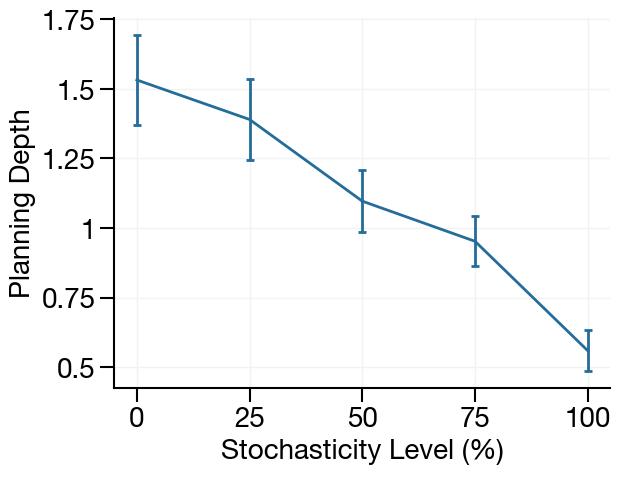

In [3]:
df_depth = a.plot_stochasticity_vs_depth()
plt.gca().set_yticklabels([strsimplify(y) for y in plt.gca().get_yticks()]);
plt.gca().set_xticklabels([strsimplify(x) for x in plt.gca().get_xticks()]);

## Mixed Models Analysis

In [10]:
print(f"Stochasticity vs Reaction Time Regression Analysis\n")
print(lmm(df_rt))

print(f"Stochasticity vs Reward Regression Analysis LMM\n")
print(lmm(df_reward))

print(f"Greedy Value vs Choice LeftRegression Analysis GLMM\n")
print(glmm(df_value))

print(f"-----------------------------------\n")

print(f"[Model] Stochasticity vs Depth Regression Analysis\n")
print(lmm(df_depth))

print(f"[Model] Stochasticity vs Reward Regression Analysis LMM\n")
print(lmm(df_reward_sim))

print(f"[Model] Greedy Value vs Choice LeftRegression Analysis GLMM\n")
print(glmm(df_value_sim))

Stochasticity vs Reaction Time Regression Analysis



/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: y~conditions+(1+conditions|participants)

Family: gaussian	 Inference: parametric

Number of observations: 15000	 Groups: {'participants': 100.0}

Log-likelihood: -15803.484 	 AIC: 31618.967

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.881  0.939
participants   conditions  0.629  0.793
Residual                   0.456  0.676

                      IV1         IV2  Corr
participants  (Intercept)  conditions -0.79

Fixed effects:

$\beta = -0.63$, $t_{99} = -7.76$, $p < 10^{-10}$

Stochasticity vs Reward Regression Analysis LMM



/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: y~conditions+(1+conditions|participants)

Family: gaussian	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -245010.764 	 AIC: 490033.529

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.290  0.538
participants   conditions  0.294  0.543
Residual                   6.207  2.491

                      IV1         IV2   Corr
participants  (Intercept)  conditions -0.984

Fixed effects:

$\beta = -1.16$, $t_{99} = -19.78$, $p < 10^{-10}$

Greedy Value vs Choice LeftRegression Analysis GLMM

Fitting generalized linear model using glmer (family binomial) with Wald confidence intervals...



/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~x*conditions+(1+x+conditions|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -54626.867 	 AIC: 109273.734

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.058  0.240
participants            x  0.112  0.335
participants   conditions  0.329  0.573

                      IV1         IV2   Corr
participants  (Intercept)           x -0.096
participants  (Intercept)  conditions -0.698
participants            x  conditions -0.045

Fixed effects:



/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~x+conditions+(1+x+conditions|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -56143.633 	 AIC: 112305.266

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.048  0.219
participants            x  0.108  0.329
participants   conditions  0.384  0.619

                      IV1         IV2   Corr
participants  (Intercept)           x -0.077
participants  (Intercept)  conditions -0.689
participants            x  conditions -0.058

Fixed effects:



/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~conditions+(1+conditions|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -72316.143 	 AIC: 144642.287

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.032  0.180
participants   conditions  0.197  0.444

                      IV1         IV2   Corr
participants  (Intercept)  conditions -0.674

Fixed effects:

Main effect of x: $\beta = 0.391$, $\chi^2(1) = 32345.0$, $p < 10^{-10}$
Interaction effect: interaction $\beta = -0.381$, $\chi^2(1) = 3033.5$, $p < 10^{-10}$

-----------------------------------

[Model] Stochasticity vs Depth Regression Analysis

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: y~conditions+(1+conditions|participants)

Family: gaussian	 Inference: parametric

Number of observations: 500	 Groups: {'participants': 100.0

/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: y~conditions+(1+conditions|participants)

Family: gaussian	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -245370.431 	 AIC: 490752.863

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.255  0.505
participants   conditions  0.251  0.501
Residual                   6.251  2.500

                      IV1         IV2   Corr
participants  (Intercept)  conditions -0.989

Fixed effects:

$\beta = -1.08$, $t_{99} = -19.84$, $p < 10^{-10}$

[Model] Greedy Value vs Choice LeftRegression Analysis GLMM

Fitting generalized linear model using glmer (family binomial) with Wald confidence intervals...



R[write to console]: boundary (singular) fit: see help('isSingular')

/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~x*conditions+(1+x+conditions|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -56987.010 	 AIC: 113994.020

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.000  0.000
participants            x  0.112  0.335
participants   conditions  0.005  0.071

                      IV1         IV2      Corr
participants  (Intercept)           x          
participants  (Intercept)  conditions          
participants            x  conditions  0.140762

Fixed effects:

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~x+conditions+(1+x+conditions|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -58056.683 	 

/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~conditions+(1+conditions|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -72775.277 	 AIC: 145560.554

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.001  0.027
participants   conditions  0.009  0.097

                      IV1         IV2  Corr
participants  (Intercept)  conditions  -1.0

Fixed effects:

Main effect of x: $\beta = 0.368$, $\chi^2(1) = 29437.2$, $p < 10^{-10}$
Interaction effect: interaction $\beta = -0.302$, $\chi^2(1) = 2139.3$, $p < 10^{-10}$



/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/planning_in_stochastic_environments/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(
